**Table of contents**<a id='toc0_'></a>    
- 1. [Préparation des Données pour l'Analyse de Sentiment](#toc1_)    
  - 1.1. [Introduction](#toc1_1_)    
    - 1.1.1. [Objectifs du Notebook](#toc1_1_1_)    
    - 1.1.2. [Contenu du Notebook](#toc1_1_2_)    
  - 1.2. [Préparation de la Variable Cible (`sentiment`)](#toc1_2_)    
  - 1.3. [Nettoyage des Tweets](#toc1_3_)    
  - 1.4. [Lemmatisation et Suppression des Stopwords](#toc1_4_)    
  - 1.5. [Filtrage et Sauvegarde des Données Prétraitées](#toc1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Préparation des Données pour l'Analyse de Sentiment](#toc0_)

## 1.1. <a id='toc1_1_'></a>[Introduction](#toc0_)

Ce notebook est consacré à la **préparation des données** pour un projet d'analyse de sentiment sur des tweets. L'objectif est de transformer les données brutes en un format propre et prêt pour l'entraînement de modèles de machine learning.

### 1.1.1. <a id='toc1_1_1_'></a>[Objectifs du Notebook](#toc0_)
1. Charger le dataset brut de tweets.
2. Appliquer un **prétraitement approfondi** pour nettoyer et normaliser le texte.
3. **Enregistrer** les données nettoyées dans un format exploitable pour les futurs notebooks de modélisation.

### 1.1.2. <a id='toc1_1_2_'></a>[Contenu du Notebook](#toc0_)
Ce notebook est structuré en plusieurs étapes :
- **Chargement des Données Brutes** : Importation du dataset depuis sa source d'origine.
- **Nettoyage des Données** : Suppression des éléments non pertinents, comme les mentions et les URLs, uniformisation de la casse, et élimination des stopwords.
- **Enregistrement des Données Préparées** : Sauvegarde du dataset nettoyé pour une utilisation future dans les notebooks de modélisation.

In [ ]:
# Importer les bibliothèques principales
import pandas as pd
import re

# Importer les bibliothèques de visualisation
import matplotlib.pyplot as plt

# Importer les bibliothèques de traitement du langage naturel (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Télécharger les ressources nécessaires pour NLTK
nltk.download('stopwords')
nltk.download('wordnet')

In [2]:
# Charger les données
data_path = 'data/training.1600000.processed.noemoticon.csv'
df = pd.read_csv(data_path, encoding='ISO-8859-1', header=None)

df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

In [4]:
df.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
# Vérifier les valeurs uniques dans la colonne 'query'
df['query'].value_counts()

query
NO_QUERY    1600000
Name: count, dtype: int64

In [6]:
# Vérifier les valeurs uniques dans la colonne 'sentiment'
df['sentiment'].value_counts()

sentiment
0    800000
4    800000
Name: count, dtype: int64

## 1.2. <a id='toc1_2_'></a>[Préparation de la Variable Cible (`sentiment`)](#toc0_)

D'après la documentation du dataset sur Kaggle, la colonne `sentiment` représente la polarité du tweet avec les valeurs suivantes :
- **0** : Sentiment négatif
- **2** : Sentiment neutre
- **4** : Sentiment positif

Pour notre analyse de sentiment binaire, nous avons vérifié que la colonne `sentiment` ne contient pas de tweets neutres (valeur 2). Ainsi, nous avons décidé de :
1. **Conserver uniquement les tweets négatifs et positifs**.
2. **Convertir les tweets positifs (valeur 4) en 1**, pour obtenir une variable cible binaire avec les valeurs suivantes :
   - **0** : Négatif
   - **1** : Positif

Cette transformation simplifie l'analyse en se concentrant uniquement sur les sentiments négatifs et positifs.

In [7]:
# Convertir 4 en 1 pour avoir un label binaire
df['sentiment'] = df['sentiment'].replace({4: 1})

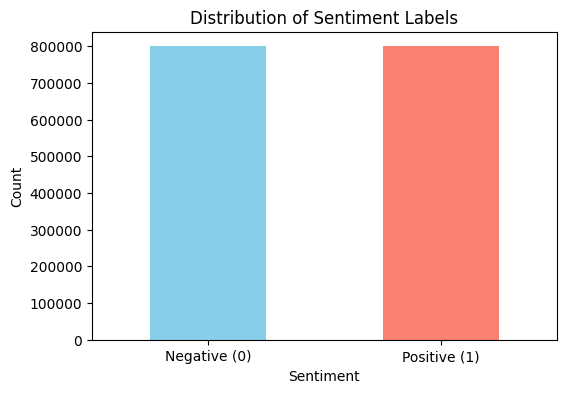

In [8]:
# Compter le nombre d'occurrences pour chaque classe de sentiment
sentiment_counts = df['sentiment'].value_counts()

# Créer un graphique à barres pour montrer la répartition des sentiments
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Negative (0)", "Positive (1)"], rotation=0)
plt.show()

## 1.3. <a id='toc1_3_'></a>[Nettoyage des Tweets](#toc0_)

Dans cette section, nous appliquons un **nettoyage approfondi** aux tweets pour enlever les éléments non pertinents et standardiser le texte. Les étapes de nettoyage incluent :

- **Suppression des mentions `@pseudo`** : Pour éviter toute information nominative.
- **Suppression des URLs** : Les liens web n'apportent pas d'informations utiles pour l'analyse de sentiment.
- **Suppression des caractères spéciaux** : En enlevant les ponctuations inutiles mais en conservant les emojis, qui peuvent exprimer des émotions.
- **Standardisation des espaces** : Les espaces multiples sont réduits à un seul espace, et les espaces en début et fin de texte sont supprimés.

Le résultat est un texte simplifié, prêt pour les étapes de lemmatisation et de transformation en vecteurs.

In [9]:
def clean_tweet(text):
    # Enlever les mentions @pseudo
    text = re.sub(r'@\w+', '', text)
    # Enlever les liens web
    text = re.sub(r'http\S+', '', text)
    # Enlever les caractères spéciaux et ponctuation (sauf les emojis)
    text = re.sub(r'[^\w\s]', '', text)
    # Supprimer les espaces superflus
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Appliquer le nettoyage sur la colonne 'text'
df['text'] = df['text'].apply(clean_tweet)

In [10]:
df.head(10)

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,Awww thats a bummer You shoulda got David Carr...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his Facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball Managed to sav...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i her...
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,hey long time no see Yes Rains a bit only a bi...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,nope they didnt have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,que me muera


## 1.4. <a id='toc1_4_'></a>[Lemmatisation et Suppression des Stopwords](#toc0_)

Cette section prépare les tweets pour qu'ils soient plus cohérents et plus significatifs en appliquant des étapes de traitement supplémentaires :

- **Téléchargement des ressources NLTK** : Les stopwords et les ressources de lemmatisation sont chargés pour le prétraitement.
- **Suppression des Stopwords** : Les mots très courants qui n’apportent pas d’information pour l’analyse de sentiment sont éliminés (comme "the", "and").
- **Lemmatisation des mots** : Chaque mot est transformé en sa forme de base, ce qui permet de réduire les variantes grammaticales tout en conservant le sens.
- **Gestion des Majuscules** : Les mots entièrement en majuscule sont conservés dans leur forme originale pour capturer une éventuelle intensité émotionnelle, tandis que les autres mots sont convertis en minuscule.

Ces transformations permettent d'uniformiser le texte tout en préservant des nuances utiles pour l’analyse de sentiment.

In [11]:
# Télécharger les ressources nécessaires
nltk.download('stopwords')
nltk.download('wordnet')

# Initialiser les outils
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Vérifier si tout le tweet est en majuscule
    if text.isupper():
        # Mettre tout en minuscule si le tweet entier est en majuscule
        text = text.lower()
    else:
        # Tokenizer le texte en mots
        words = text.split()
        
        # Conserver les mots en majuscule, mettre les autres en minuscule et enlever les stopwords
        # Appliquer la lemmatisation
        words = [lemmatizer.lemmatize(word) if word.isupper() 
                 else lemmatizer.lemmatize(word.lower())
                 for word in words if word.lower() not in stop_words]
        
        # Recréer le tweet à partir des mots traités
        text = ' '.join(words)
        
    return text

# Appliquer le prétraitement sur la colonne 'text'
df['text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
df['text'].sample(10)

35417                           hahaha problem sometimes fun
341628                                   morningswho need em
100152                             never commented back post
943141                         bdupis work ugh ready weekend
681596                                  STILL havent replied
1446428                                                 good
788873                                  last dayof 7th grade
1189025                     lot fun ill attempt call tonight
988454       aawww knitsforneeds heart cant wait see sweater
76721      one misspelled reference two crushed english m...
Name: text, dtype: object

## 1.5. <a id='toc1_5_'></a>[Filtrage et Sauvegarde des Données Prétraitées](#toc0_)

Avant de sauvegarder le dataset prétraité, nous filtrons les colonnes pour ne conserver que les informations nécessaires pour l'entraînement des modèles :

- **`sentiment`** : La colonne cible, qui indique si le tweet est positif (1) ou négatif (0).
- **`text`** : Le texte du tweet, nettoyé et prêt pour l'analyse de sentiment.

En filtrant ces colonnes, nous allégeons le fichier final et facilitons son utilisation dans les notebooks de modélisation. Le dataset nettoyé est ensuite sauvegardé dans un fichier CSV pour une réutilisation facile.

In [13]:
# Filtrer pour ne garder que les colonnes nécessaires
df = df[['sentiment', 'text']]

# Sauvegarder le DataFrame prétraité dans un fichier CSV
df.to_csv('data/processed_tweets.csv', index=False)